# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

### Assignments 1: 
#### Find `Most Common Words` and create word cloud.

In [1]:
pip install nltk matplotlib wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

In [3]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


#### Read in the document-term matrix

In [6]:
import pickle
with open("pickle\\dtm.pkl", 'rb') as file:
    data = pickle.load(file)
data

aaaaah  aaaaahhhhhhh  aaaaauuugghhhhhh  aaaahhhhh  aaah  aah  abc  \
ali           0             0                 0          0     0    0    1   
anthony       0             0                 0          0     0    0    0   
bill          1             0                 0          0     0    0    0   
bo            0             1                 1          1     0    0    0   
dave          0             0                 0          0     1    0    0   
hasan         0             0                 0          0     0    0    0   
jim           0             0                 0          0     0    0    0   
joe           0             0                 0          0     0    0    0   
john          0             0                 0          0     0    0    0   
louis         0             0                 0          0     0    3    0   
mike          0             0                 0          0     0    0    0   
ricky         0             0                 0          0     0    0    0   

         abcs  ability  abject  ...  zee  zen  zeppelin  zero  zillion  \
ali         0        0       0  ...    0    0         0     0        0   
anthony     0        0       0  ...    0    0         0     0        0   
bill        1        0       0  ...    0    0         0     1        1   
bo          0        1       0  ...    0    0         0     1        0   
dave        0        0       0  ...    0    0         0     0        0   
hasan       0        0       0  ...    2    1         0     1        0   
jim         0        0       0  ...    0    0         0     0        0   
joe         0        0       0  ...    0    0         0     0        0   
john        0        0       0  ...    0    0         0     0        0   
louis       0        0       0  ...    0    0         0     2        0   
mike        0        0       0  ...    0    0         2     1        0   
ricky       0        1       1  ...    0    0         0     0        0   

         zombie  zombies  zoning  zoo  éclair  
ali           1        0       0    0       0  
anthony       0        0       0    0       0  
bill          1        1       1    0       0  
bo            0        0       0    0       0  
dave          0        0       0    0       0  
hasan         0        0       0    0       0  
jim           0        0       0    0       0  
joe           0        0       0    0       0  
john          0        0       0    0       1  
louis         0        0       0    0       0  
mike          0        0       0    0       0  
ricky         0        0       0    1       0  

[12 rows x 7484 columns]

#### Find  and print the top 30 words said by each comedian


In [15]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

comedian_names = ['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe']
df = pd.DataFrame(data, index=comedian_names)
for comedian in comedian_names:
    top_words = df.loc[comedian].sort_values(ascending=False).head(30)
    print(f"\nTop 30 words for {comedian}:\n")
    print(top_words)


Top 30 words for louis:

like      110
just       97
know       70
dont       53
thats      51
im         50
youre      50
life       41
people     40
thing      31
gonna      29
hes        29
cause      28
theres     28
shit       25
time       22
good       22
tit        22
theyre     21
think      21
right      21
really     20
course     19
murder     18
guy        18
kids       18
ok         17
mean       15
fuck       15
old        15
Name: louis, dtype: int64

Top 30 words for dave:

like       103
know        79
said        63
just        61
im          47
shit        45
people      43
didnt       39
ahah        38
dont        38
time        36
fuck        33
thats       33
fucking     32
black       31
man         30
got         27
good        27
right       22
gonna       21
lot         20
gay         20
nigga       20
hes         19
did         19
oh          18
yeah        18
oj          18
come        17
guys        16
Name: dave, dtype: int64

Top 30 words for ricky:

ri

#### By looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that. Look at the most common top words and add them to the stop word list.



In [16]:
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
num_common_words = 20
all_words_counter = Counter(df.stack())
most_common_words = [word for word, _ in all_words_counter.most_common(num_common_words)]
custom_stop_words = ENGLISH_STOP_WORDS.union(most_common_words)
print(f"\nMost common words across all comedians:\n{most_common_words}")
print(f"\nUpdated stop words list:\n{custom_stop_words}")


Most common words across all comedians:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 11, 13, 15, 14, 19, 18, 21, 16]

Updated stop words list:
frozenset({0, 1, 2, 3, 4, 5, 'eleven', 6, 7, 8, 'nine', 'become', 'almost', 9, 'seeming', 'do', 10, 12, 11, 13, 15, 14, 19, 18, 'several', 21, 'amount', 'his', 'per', 'each', 'the', 'thick', 'hereafter', 'between', 'show', 'found', 'myself', 'eg', 're', 'top', 'give', 16, 'etc', 'hers', 'own', 'someone', 'anyone', 'behind', 'before', 'find', 'mostly', 'latterly', 'still', 'how', 'with', 'although', 'both', 'yourselves', 'him', 'nor', 'at', 'done', 'thence', 'via', 'see', 'herself', 'side', 'can', 'when', 'within', 'another', 'your', 'beside', 'please', 'move', 'until', 'may', 'more', 'wherever', 'whose', 'nothing', 'thin', 'de', 'detail', 'throughout', 'along', 'many', 'ie', 'there', 'serious', 'hence', 'this', 'others', 'while', 'over', 'already', 'once', 'thereby', 'among', 'has', 'much', 'will', 'whither', 'whether', 'them', 'thus', 'towards', 'am

#### Let's aggregate this list and identify the most common words along with how many routines they occur in


In [17]:
all_common_words = [word for comedian in comedian_names for word in df.loc[comedian].sort_values(ascending=False).head(num_common_words).index]
word_occurrences = Counter(all_common_words)
print("\nMost common words and their occurrences across routines:")
for word, count in word_occurrences.most_common():
    print(f"{word}: {count} routines")


Most common words and their occurrences across routines:
like: 12 routines
just: 12 routines
know: 12 routines
dont: 12 routines
im: 12 routines
thats: 11 routines
right: 11 routines
youre: 10 routines
people: 10 routines
got: 9 routines
think: 7 routines
said: 7 routines
gonna: 6 routines
time: 6 routines
fucking: 6 routines
shit: 5 routines
cause: 4 routines
fuck: 4 routines
say: 4 routines
theyre: 3 routines
yeah: 3 routines
want: 3 routines
day: 3 routines
oh: 3 routines
life: 2 routines
thing: 2 routines
hes: 2 routines
theres: 2 routines
good: 2 routines
didnt: 2 routines
man: 2 routines
went: 2 routines
id: 2 routines
little: 2 routines
joke: 2 routines
love: 2 routines
going: 2 routines
goes: 2 routines
mom: 2 routines
tit: 1 routines
ahah: 1 routines
black: 1 routines
bo: 1 routines
stuff: 1 routines
repeat: 1 routines
cos: 1 routines
eye: 1 routines
um: 1 routines
prolonged: 1 routines
dude: 1 routines
did: 1 routines
guns: 1 routines
clinton: 1 routines
hey: 1 routines
old:

#### If more than half of the comedians have it as a top word, exclude it from the list


In [18]:
all_common_words = [word for comedian in comedian_names for word in df.loc[comedian].sort_values(ascending=False).head(num_common_words).index]
word_occurrences = Counter(all_common_words)
exclude_threshold = len(comedian_names) / 2
filtered_words = {word: count for word, count in word_occurrences.items() if count <= exclude_threshold}
print("\nFiltered list of common words (excluding those in more than half of the comedians' top words):")
for word, count in filtered_words.items():
    print(f"{word}: {count} routines")


Filtered list of common words (excluding those in more than half of the comedians' top words):
life: 2 routines
thing: 2 routines
gonna: 6 routines
hes: 2 routines
cause: 4 routines
theres: 2 routines
shit: 5 routines
time: 6 routines
good: 2 routines
tit: 1 routines
theyre: 3 routines
didnt: 2 routines
ahah: 1 routines
fuck: 4 routines
fucking: 6 routines
black: 1 routines
man: 2 routines
yeah: 3 routines
say: 4 routines
went: 2 routines
id: 2 routines
little: 2 routines
joke: 2 routines
love: 2 routines
bo: 1 routines
stuff: 1 routines
repeat: 1 routines
want: 3 routines
cos: 1 routines
eye: 1 routines
um: 1 routines
prolonged: 1 routines
dude: 1 routines
did: 1 routines
day: 3 routines
oh: 3 routines
going: 2 routines
goes: 2 routines
guns: 1 routines
clinton: 1 routines
hey: 1 routines
mom: 2 routines
old: 1 routines
dad: 1 routines
shes: 1 routines
hasan: 1 routines
ok: 1 routines
lot: 1 routines
gotta: 1 routines
wanna: 1 routines
husband: 1 routines
women: 1 routines
anthony: 1

In [22]:
x=[]
x.extend(filtered_words.keys())
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
stwd= list(set(ENGLISH_STOP_WORDS).union(x))
# Read in cleaned data
with open("pickle\\data_clean.pkl", 'rb') as file:
    cd = pickle.load(file)
# Add new stop words
cv = CountVectorizer(stop_words= stwd)
data_cv = cv.fit_transform(cd.transcript)
# Recreate document-term matrix
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm.index = cd.index
# Pickle it for later use
data_dtm.to_pickle("pickle\\dtm_ass3.pkl")

In [23]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud

In [24]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


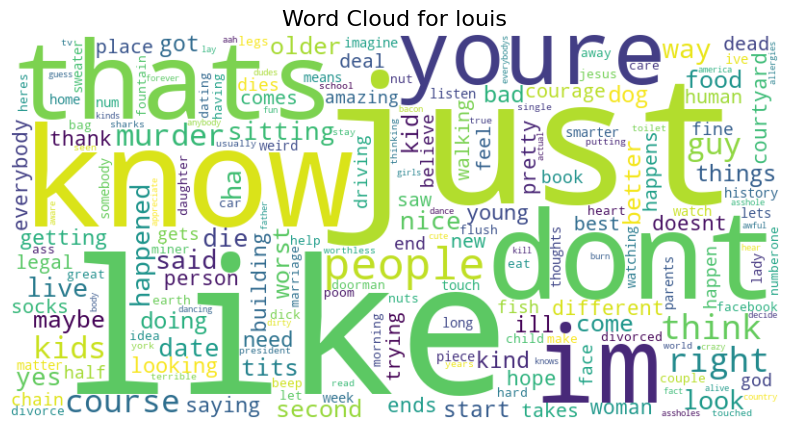

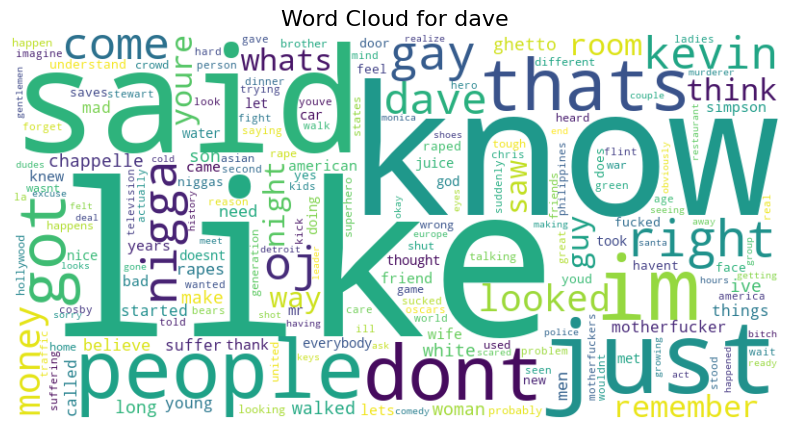

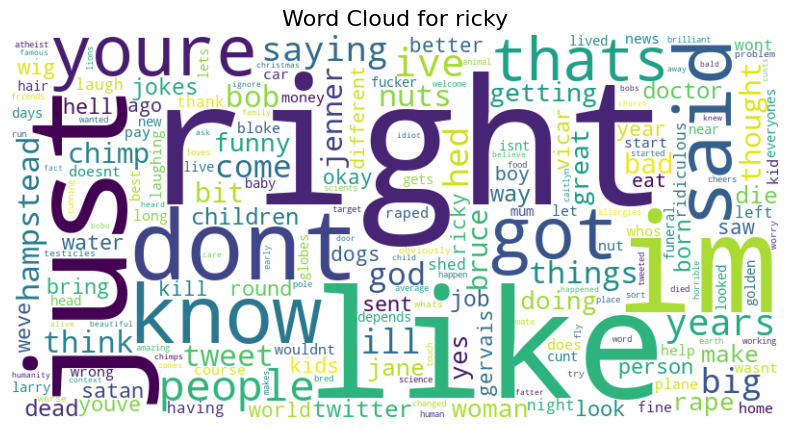

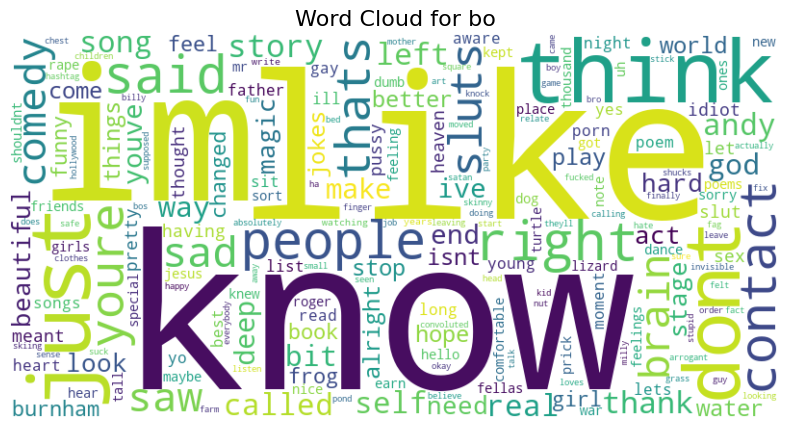

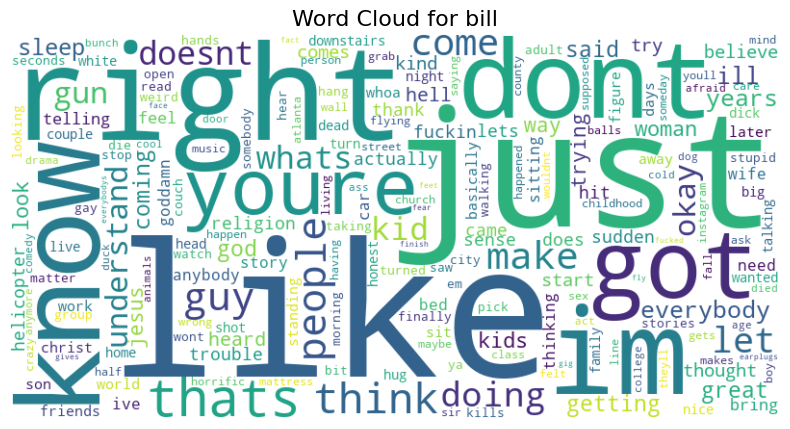

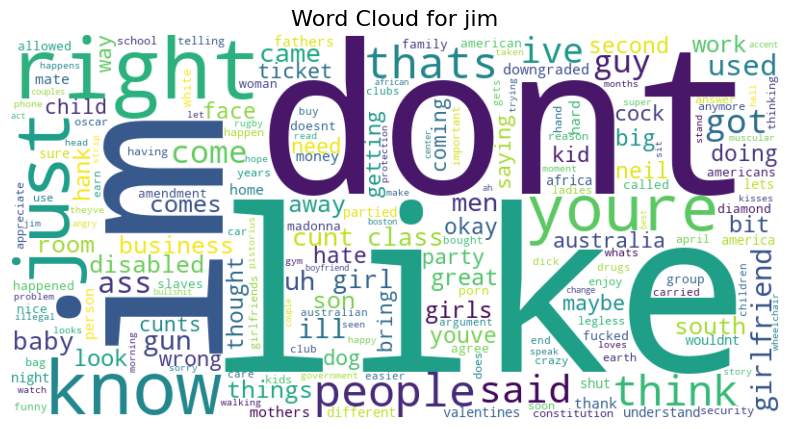

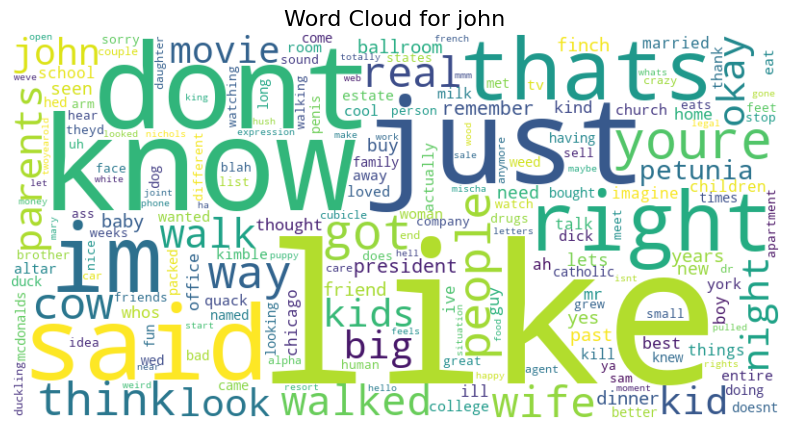

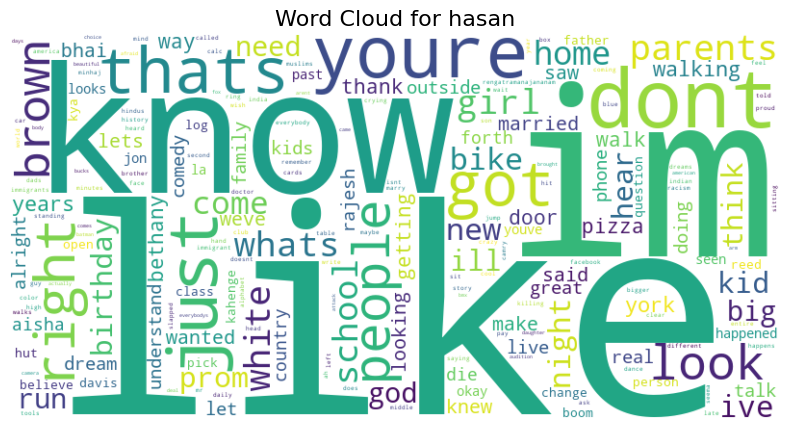

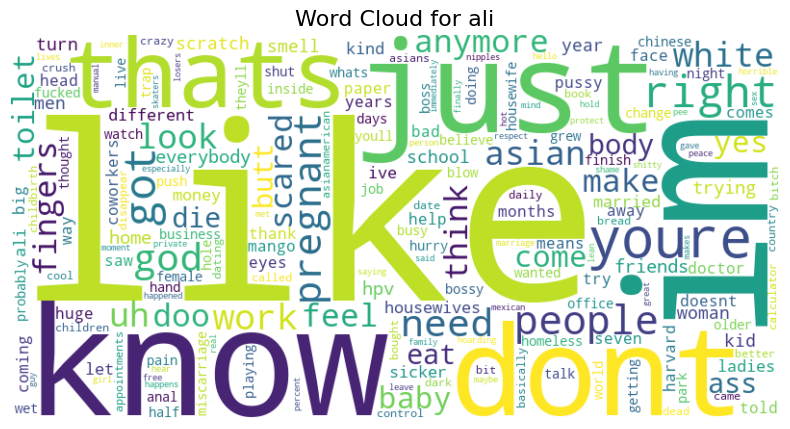

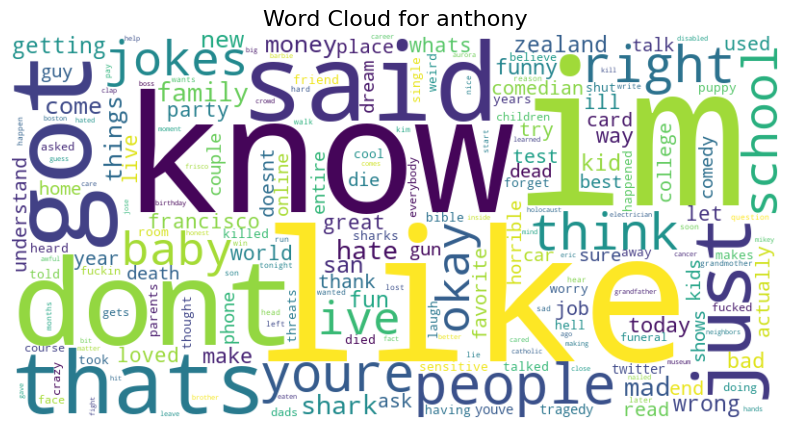

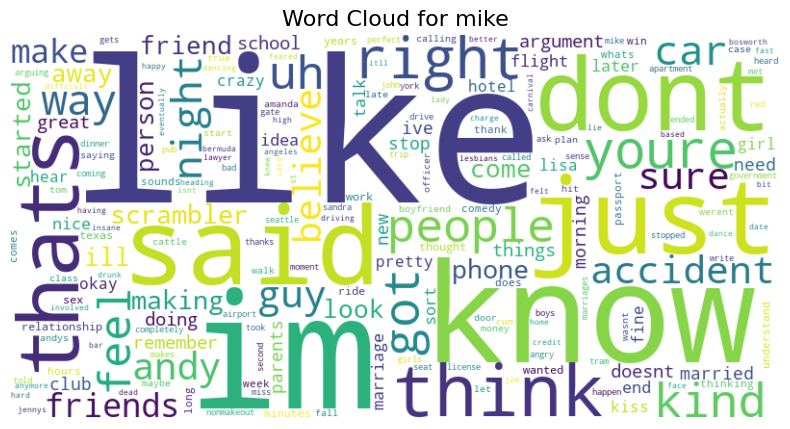

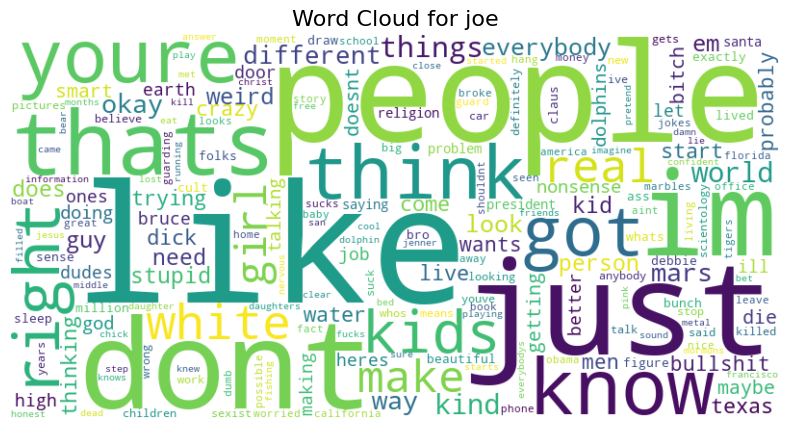

In [25]:
# Reset the output dimensions
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you have your document-term matrix (dtm) stored in a variable named 'dtm'
# Replace this with your actual document-term matrix

# Generate a word cloud for each comedian
for comedian in comedian_names:
    # Extract the row corresponding to the comedian
    comedian_row = data_dtm.loc[comedian]

    # Create a dictionary from the row (word frequencies)
    word_freq_dict = comedian_row.to_dict()

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {comedian}', fontsize=16)
    plt.axis('off')
    plt.show()

## MY observations:
1. Like, Know and Dont are the most used words.
2. Bill uses words like "Right," "Christ," "believe," and "mind" may suggest a focus on conviction, religious beliefs, and thoughtful perspectives. 
3. Dave uses words like "gay", "nigga" and referencing "Simpson" and "Chappelle" may be expressing themselves with a mix of diverse language and cultural influences.
4. Ali uses words like "women," "lady," "fingers," "housewives," and "babies" may convey a perspective associated with femininity, domesticity, and possibly a nurturing or family-oriented mindset.

### Assignment 2:
#### Find the number of unique words that each comedian uses.

In [26]:
uni = data_dtm.apply(lambda row: sum(row > 0), axis=1)
print("Number of unique words used by each comedian:")
print(uni)

Number of unique words used by each comedian:
ali        1291
anthony     933
bill       1585
bo         1222
dave       1358
hasan      1518
jim        1267
joe        1385
john       1344
louis      1051
mike       1453
ricky      1589
dtype: int64


In [27]:
# Calculate the words per minute of each comedian
Run_Time=[]
Run_Time=[45,56,59,43,40,60,53,58,50,41,56,55]
df = pd.DataFrame(data_dtm, index=comedian_names)
total = df.sum(axis=1)
wpm=total/Run_Time
print("Words per minute:")
print(wpm)

# Find the total number of words that a comedian uses
print("Total number of words used by each comedian:")
print(total)
# add some columns to our dataframe: 'total_words', 'run_times' and 'words_per_minute'
df['total_words']=total
df['run_times']=Run_Time
df['words_per_minute']=wpm
# Sort the dataframe by words per minute to see who talks the slowest and fastest
df=df.sort_values(by='words_per_minute', ascending=False)

Words per minute:
louis       61.200000
dave        61.553571
ricky       71.525424
bo          59.837209
bill       114.550000
jim         64.483333
john        64.867925
hasan       70.568966
ali         55.360000
anthony     58.804878
mike        73.250000
joe         68.472727
dtype: float64
Total number of words used by each comedian:
louis      2754
dave       3447
ricky      4220
bo         2573
bill       4582
jim        3869
john       3438
hasan      4093
ali        2768
anthony    2411
mike       4102
joe        3766
dtype: int64


In [28]:
# plot our findings
#import numpy as np

df

aaaaah  aaaaahhhhhhh  aaaaauuugghhhhhh  aaaahhhhh  aaah  aah  abc  \
bill          1             0                 0          0     0    0    0   
mike          0             0                 0          0     0    0    0   
ricky         0             0                 0          0     0    0    0   
hasan         0             0                 0          0     0    0    0   
joe           0             0                 0          0     0    0    0   
john          0             0                 0          0     0    0    0   
jim           0             0                 0          0     0    0    0   
dave          0             0                 0          0     1    0    0   
louis         0             0                 0          0     0    3    0   
bo            0             1                 1          1     0    0    0   
anthony       0             0                 0          0     0    0    0   
ali           0             0                 0          0     0    0    1   

         abcs  ability  abject  ...  zero  zillion  zombie  zombies  zoning  \
bill        1        0       0  ...     1        1       1        1       1   
mike        0        0       0  ...     1        0       0        0       0   
ricky       0        1       1  ...     0        0       0        0       0   
hasan       0        0       0  ...     1        0       0        0       0   
joe         0        0       0  ...     0        0       0        0       0   
john        0        0       0  ...     0        0       0        0       0   
jim         0        0       0  ...     0        0       0        0       0   
dave        0        0       0  ...     0        0       0        0       0   
louis       0        0       0  ...     2        0       0        0       0   
bo          0        1       0  ...     1        0       0        0       0   
anthony     0        0       0  ...     0        0       0        0       0   
ali         0        0       0  ...     0        0       1        0       0   

         zoo  éclair  total_words  run_times  words_per_minute  
bill       0       0         4582         40        114.550000  
mike       0       0         4102         56         73.250000  
ricky      1       0         4220         59         71.525424  
hasan      0       0         4093         58         70.568966  
joe        0       0         3766         55         68.472727  
john       0       1         3438         53         64.867925  
jim        0       0         3869         60         64.483333  
dave       0       0         3447         56         61.553571  
louis      0       0         2754         45         61.200000  
bo         0       0         2573         43         59.837209  
anthony    0       0         2411         41         58.804878  
ali        0       0         2768         50         55.360000  

[12 rows x 7425 columns]

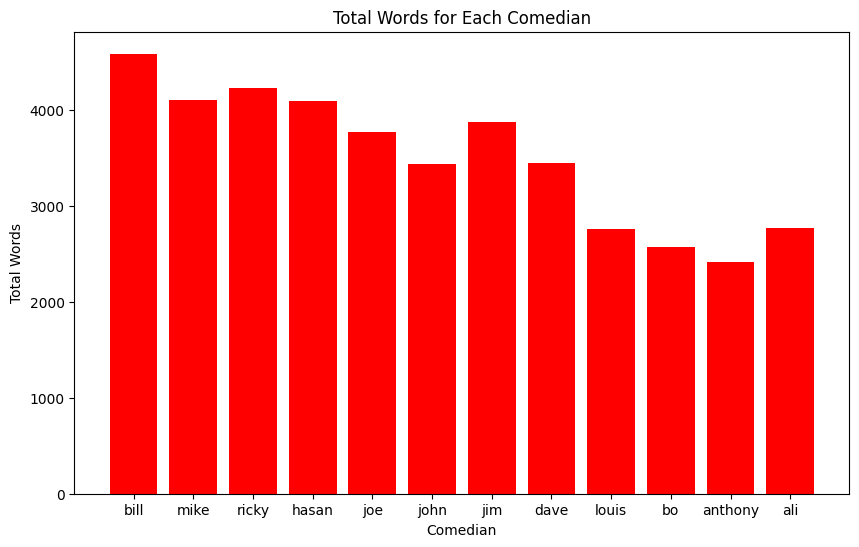

In [30]:
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['total_words'], color='red')
plt.title('Total Words for Each Comedian')
plt.xlabel('Comedian')
plt.ylabel('Total Words')
plt.show()

## Write my findings. For example:
* **Vocabulary**
   * Ricky and Bill Burr use a lot of words in their comedy
   * Louis and Anthony have a smaller vocabulary

* **Talking Speed**
   * Bill and mike talk fast
   * Ali and Anthony talk slow

In [32]:
# take a look at the most common words.
profanity = [ 'fuck', 'fucking', 'fucked', 'fcking', 'fcked', 'motherfucker', 'nigga', 'fck', 'fcking', 'bitch', 'ngga', 'bitches', 'pussy', 'dick', 'dickhead', 'dck']
df = pd.DataFrame(data_dtm, index=comedian_names)
existing_profanity = [word for word in profanity if word in df.columns]

if existing_profanity:
    df['profanity_count'] = df[existing_profanity].sum(axis=1)
    print(df['profanity_count'])
else:
    print("No profanity word columns found in the dataframe.")

louis       7
dave       46
ricky       2
bo         13
bill       16
jim        17
john       10
hasan       7
ali        16
anthony     5
mike        0
joe        30
Name: profanity_count, dtype: int64


In [33]:
# isolate just these bad words
existing_profanity_words = [word for word in profanity if word in df.columns]

if existing_profanity_words:
    for word in existing_profanity_words:
        df[f'{word}_count'] = df[word]

    print(df[ [word for word in existing_profanity_words]])
else:
    print("No profanity word columns found in the dataframe.")

         fucked  motherfucker  nigga  bitch  bitches  pussy  dick
louis         0             1      0      0        0      2     4
dave          7            10     20      4        0      2     3
ricky         1             0      0      1        0      0     0
bo            3             0      0      2        0      6     2
bill          4             1      0      2        0      2     7
jim           7             0      0      2        0      3     5
john          0             2      0      1        0      0     7
hasan         4             0      0      0        0      0     3
ali           4             1      0      3        2      5     1
anthony       4             0      0      1        0      0     0
mike          0             0      0      0        0      0     0
joe           2             3      0     10        1      2    12


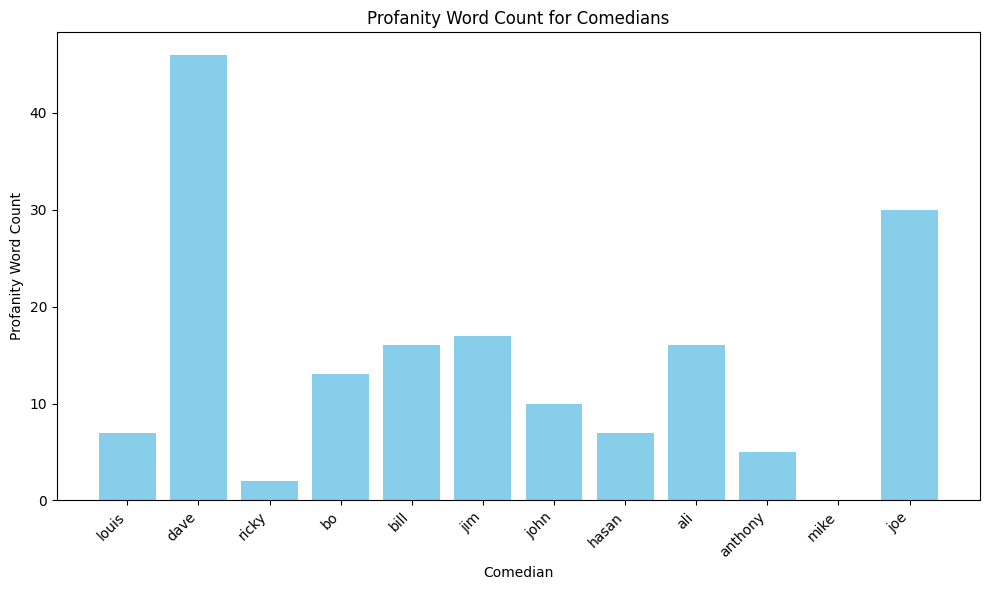

In [35]:
# create a scatter plot of your findings
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['profanity_count'], color='skyblue')
plt.xlabel('Comedian')
plt.ylabel('Profanity Word Count')
plt.title('Profanity Word Count for Comedians')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Write your findings. 
#### For example:
1. Dave and Joe have high Profanity
2. Ricky and Mike have clean humour

### Assignment 4:(optional)
What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.